# Data Mining Project: "To loan or not to loan"

This notebook's book is to analayze data for the Data Mining Project

## Business Understanding

### Definition of business goals (Add information after reaching conclusions during the project)

This project's goal is to improve the bank services by using the stored data about the customers to improve the bank's understanding of them

This is going to be done through a Data Mining project which contains 2 problems:

- The predictive problem, whose goal is to predict whether a loan given to a client will end successfully
- The descriptive problem, which is related to the data analysis, and consists of the process of observing and interpreting the data in order to find the relevance of each data component for the predictive model and the correlation between attributes

### Translation of business goals into data mining goals

- Data preparation, by analyzing the provided data and its quality. We can study the data quality by analyzing their outliers, missing, duplicate and inconsistent values, and decide how to deal with them
- Data understanding, by applying a statistical analysis to the data and plotting the appropriate graphs

## Data Understanding

Imports needed:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Read CSV Files:

In [5]:
df = pd.read_csv('../project/banking_data/trans_test.csv')

Switching date format of client to YYYY/MM/DD and differ male from female

- If the date is YY(MM+50)DD (if the month is greater or equal to 51), the client is female
- Otherwise, the client is male

In [6]:
client = pd.read_csv('../project/banking_data/client.csv', sep=';')

date = client["birth_number"]
date = date.apply(str)
date = '19' + date
date


lst = []
for item in date:
    lst.append(item[4:6])
    

months = []
gender = [] 
for item in lst:
    if(int(item) > 50):
        months.append(int(item)- 50)
        gender.append('female')
    else:
        months.append(int(item))
        gender.append('male')
        
### Replace the old month valuees

for i in range(len(date)):
    if gender[i] == 'female':
        date[i] = str(int(date[i])-5000)

date = date.apply(lambda x: datetime.strptime(x,'%Y%m%d'))
#date = date.apply(lambda x: datetime.strptime(x,'%Y%m%d').strftime('%m/%d/%y'))

We decided to study whether the bank has more male or female clients. We created a piechart and a barchart to visualize the difference between these genders.

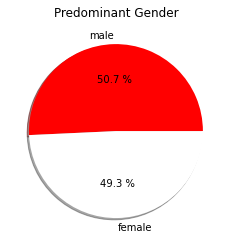

In [7]:
colors = ["#FF0000","#FFFFFF"]
genders = [gender.count("male"),gender.count("female")]
labels = ["male","female"]

plt.pie(genders,labels =labels,colors = colors,shadow = True,autopct='%.1f %%')
plt.title('Predominant Gender')
plt.show()

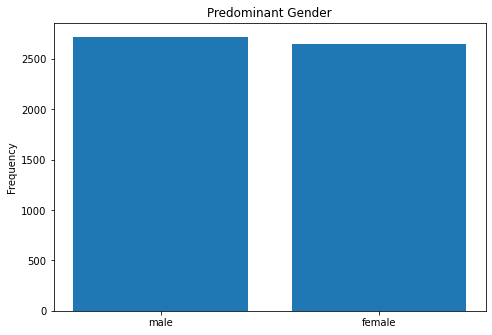

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,genders)
plt.title('Predominant Gender')
plt.ylabel('Frequency')
plt.show()

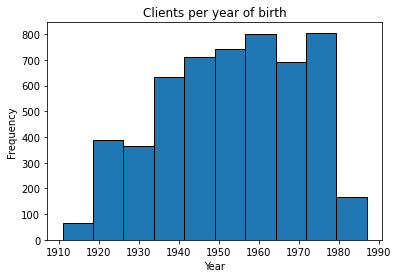

In [9]:
# Convert "year" column dType to numeric to allow plotting
years = []


for item in date:
    years.append(item.year)
    


# Plotting an histogram with the release years
plt.hist(years,ec="black")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Clients per year of birth')

plt.show()

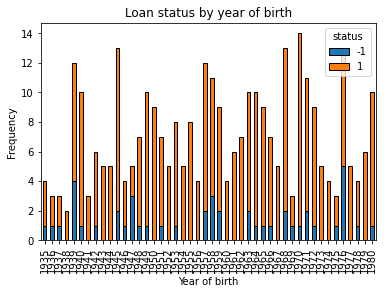

In [10]:
bs = pd.read_csv('../csvs/birth_status.csv', sep=';')
        
year = []
for item in bs["birth_number"]:
    year.append(1900 + item // 10000)

bs["year"] = year

bs = bs.drop(['birth_number'], 1)

statusbyyearfreq = pd.crosstab(bs['year'], bs['status'])

statusbyyearfreq.plot(kind="bar", stacked=True, ec="black")

plt.title("Loan status by year of birth")
plt.xlabel("Year of birth")
plt.ylabel("Frequency")

plt.show()

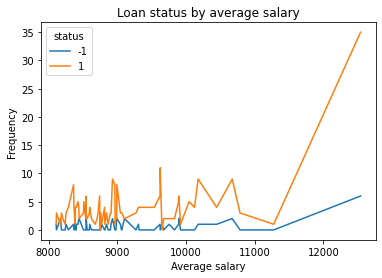

In [19]:
ss = pd.read_csv('../csvs/salary_status.csv', sep=';')

statusbysalaryfreq = pd.crosstab(ss['average_salary'], ss['status'])

statusbysalaryfreq.plot(kind="line")

plt.title("Loan status by average salary")
plt.xlabel("Average salary")
plt.ylabel("Frequency")

plt.show()

In [ ]:
loan = pd.read_csv('./project/banking_data/loan_train.csv',sep=';')
test = pd.read_csv('./project/banking_data/loan_test.csv',sep=';')

amount = loan["amount"]

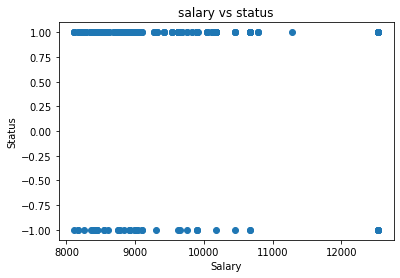

In [ ]:
d = pd.read_csv('./csvs/salary_status.csv',sep=';')

d["average_salary"]

d.sort_values(["average_salary"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True)

#plt.plot(d["average_salary"], d["status"])
plt.scatter(d["average_salary"], d["status"])
plt.title('salary vs status')
plt.xlabel('Salary')
plt.ylabel('Status')
plt.show()

In [ ]:
def checkmult(x):
    return x["payments"] * x["duration"] == x["amount"]

bls = loan.apply(checkmult,axis=1)

bls.tolist().count(False)

bls

# Thus we can conclude that there are no mistakes in the loan_train dataset
# Now to the loan_test dataset


bls = test.apply(checkmult,axis=1)

bls.tolist().count(False)

# WE have concluded that the column tht that columns has also no problems
# We currently ahve 3 columns, 2 of which give enough information to obtain the third, hence 1 of them is uselesss
# We have decided to mantain this format by now, because the overhead gives some usefull information with havint to perform mathematic counts

0